In [6]:
#This program outputs and plots weekly HNT earnings/rewards for data transfers(data), PoC witnessing(witness) and PoC challenging(beacon), consensus group rewards, and securities rewards for multiple hotspots
#in a given perimeter, plus total weekly HNT earnings/rewards for those hotspots

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
from matplotlib import pyplot as plt
import numpy as np

scen = "norfolkVA"
lat = "36.850800"
lon = "-76.285900"

#scen = "miamiFL"
#lat = "25.856630"
#lon = "-80.278249"

#Seattle, WA: 47.604872,-122.333622
#scen = "seattleWA"
#lat = "47.604872"
#lon = "-122.333622"

#Denver, CO: 39.743418,-104.992285
#scen = "denverCO"
#lat = "39.743418"
#lon = "-104.992285"

#Topeka, KS: 39.033278,-95.681458
#scen = "topekaKS"
#lat = "39.033278"
#lon = "-95.681458"

#Rome, GA: 34.258591,-85.176021
#scen = "romeGA"
#lat = "34.258591"
#lon = "-85.176021"

#Turlock, CA: 37.506028,-120.848877
# scen = "turlockCA"
# lat = "37.506028"
# lon = "-120.848877"

distance = '700'
dict1 = {}
dict2 = {}

url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance="+distance
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance="+distance
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])

minTime = []
maxTime = []
current_date = date.today()

for i in range(1,10):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=7)
    minTime.append(priorDate)
    current_date = priorDate    

dataPerAddress = {}
witnessesPerAddress = {}
challengeesPerAddress = {}
challengersPerAddress = {}
consensusPerAddress = {}
securitiesPerAddress = {}
totalRewardsPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
    witnessesPerAddress[dict2['data'][i]['address']] = []
    challengeesPerAddress[dict2['data'][i]['address']] = []
    challengersPerAddress[dict2['data'][i]['address']] = []
    consensusPerAddress[dict2['data'][i]['address']] = []
    securitiesPerAddress[dict2['data'][i]['address']] = []
    totalRewardsPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())

sum_data = 0
sum_witness = 0
sum_challengee = 0
sum_challenger = 0
sum_consensus = 0
sum_securities = 0
sum_rewards_total = 0
dict = {}

for a in dataPerAddress:
    url = ""
    cursor = ''
    print("Current address: ", a)
    for t in range(len(minTime)): 
        i = 0
        j = 0
        dict.clear()
        url = "https://api.helium.io/v1/hotspots/" + a + "/activity/?filter_types=rewards_v2&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        try:
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
            while "cursor" in dict:
                for i in range(len(dict['data'])):
                    for y in dict['data'][i]['rewards']:
                        sum_rewards_total = sum_rewards_total + (y['amount']/ 100000000)
                    for x in dict['data'][i]['rewards']:
                        if x['type'] == 'data_credits':
                            sum_data = sum_data + (x['amount'] / 100000000)
                        if x['type'] == 'poc_witnesses':
                            sum_witness = sum_witness + (x['amount'] / 100000000) 
                        if x['type'] == 'poc_challengees':
                            sum_challengee = sum_challengee + (x['amount'] / 100000000)
                        if x['type'] == 'poc_challengers':
                            sum_challenger = sum_challenger + (x['amount'] / 100000000)
                        if x['type'] == 'consensus':
                            sum_consensus = sum_consensus + (x['amount'] / 100000000)
                        if x['type'] == 'securities':
                            sum_securities = sum_securities + (x['amount'] / 100000000)


                cursor = dict['cursor']
                url = "https://api.helium.io/v1/hotspots/" + a + "/activity/?filter_types=rewards_v2&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
                url = url + "&cursor=" + cursor
                try:
                    dict = json.loads(requests.get(url).text)
                except:
                    print("Requests did not work for ", a)
                time.sleep(1)
        except:
            print("failed on requests of url for ", a)
        else:
            if ('data' in dict.keys()):
                for j in range(len(dict['data'])):
                    for z in dict['data'][j]['rewards']:
                        sum_rewards_total = sum_rewards_total + (z['amount']/ 100000000)
                    for x in dict['data'][j]['rewards']:
                        if x['type'] == 'data_credits':
                            sum_data = sum_data + (x['amount'] / 100000000)
                        if x['type'] == 'poc_witnesses':
                            sum_witness = sum_witness + (x['amount'] / 100000000)
                        if x['type'] == 'poc_challengees':
                            sum_challengee = sum_challengee + (x['amount'] / 100000000)
                        if x['type'] == 'poc_challengers':
                            sum_challenger = sum_challenger + (x['amount'] / 100000000)
                        if x['type'] == 'consensus':
                            sum_consensus = sum_consensus + (x['amount'] / 100000000)
                        if x['type'] == 'securities':
                            sum_securities = sum_securities + (x['amount'] / 100000000)
            time.sleep(1)
        dataPerAddress[a].append(sum_data)
        witnessesPerAddress[a].append(sum_witness)
        challengeesPerAddress[a].append(sum_challengee)
        challengersPerAddress[a].append(sum_challenger)
        consensusPerAddress[a].append(sum_consensus)
        securitiesPerAddress[a].append(sum_securities)
        totalRewardsPerAddress[a].append(sum_rewards_total)
        sum_data = 0
        sum_witness = 0
        sum_challengee = 0
        sum_challenger = 0
        sum_consensus = 0
        sum_securities = 0
        sum_rewards_total = 0
    dataPerAddress[a].reverse()
    witnessesPerAddress[a].reverse()
    challengeesPerAddress[a].reverse()
    challengersPerAddress[a].reverse()
    consensusPerAddress[a].reverse()
    securitiesPerAddress[a].reverse()
    totalRewardsPerAddress[a].reverse()
    #print(dataPerAddress[a])
    #print(witnessesPerAddress[a])
    #print(challengeesPerAddress[a])
    #print(challengersPerAddress[a])
    #print(consensusPerAddress[a])
    #print(securitiesPerAddress[a])
    #print(totalRewardsPerAddress[a])
    
#     plt.bar(range(9), dataPerAddress[a], label = "Data Transfer Rewards")
#     plt.legend()
#     plt.show()
#     plt.bar(range(9), witnessesPerAddress[a], label = "POC Witness Rewards")
#     plt.legend()
#     plt.show()
#     plt.bar(range(9), challengesPerAddress[a], label = "POC Challengee Rewards")
#     plt.legend()
#     plt.show()
#     plt.bar(range(9), totalRewardsPerAddress[a], label = "Total Rewards")
#     plt.legend()
#     plt.show()
        
num_datatrans_hotspots = 0
num_poc_hotspots = 0
        
for a in dataPerAddress:
    if not (all(v == 0 for v in dataPerAddress[a])):
        num_datatrans_hotspots += 1
    if not (all(v == 0 for v in witnessesPerAddress[a])) or not (all(v == 0 for v in challengeesPerAddress[a]) or not (all(v == 0 for v in challengersPerAddress[a]))):
        num_poc_hotspots += 1
        
perc_data = (num_datatrans_hotspots / (len(hotspot_names))) * 100
perc_poc = (num_poc_hotspots / (len(hotspot_names))) * 100
print("Number of hotspots providing data transfer: %d (Percentage: %%%f)" % (num_datatrans_hotspots, perc_data))
print("Number of hotspots providing proof-of-coverage: %d (Percentage: %%%f)" % (num_poc_hotspots, perc_poc))      
        
        
#dict.clear()
#sum_data = 0
#sum_witness = 0
#sum_challengee = 0
#sum_challenger = 0
#sum_consensus = 0
#sum_securities = 0
#sum_rewards_total = 0
#cursor=''
#dataPerAddress.clear()
#witnessesPerAddress.clear()
#challengeesPerAddress.clear()
#challengersPerAddress.clear()
#consensusPerAddress.clear()
#securitiesPerAddress.clear()
#totalRewardsPerAddress.clear()
#num_datatrans_hotspots = 0
#num_poc_hotspots = 0
#perc_data = 0
#perc_poc = 0

dict_keys(['112PCSeziHdCF7q9FtwP2ZpcMWLcQQ2TvqKTA5PiEdBUkp1tztyq', '1126iQkQHsnN1wF1W28rtMwUuXkK8T1CCpRTMagbMq72wAfGkwqB', '112UeTZNywwRzkQg3tzUejtptWMSnkcHsRNs71qf7Mx4iCrPNQ2s', '11Qa3N74PBuo9f5sRPQ9VoZtDWGdw12jHSWERXs1PiEJ6icsKmw', '11U1wgt9DaCkjTup6Zigkr7jFFQ58LDo4yWCcgX3LTopxz1crmM'])
Current address:  112PCSeziHdCF7q9FtwP2ZpcMWLcQQ2TvqKTA5PiEdBUkp1tztyq
Current address:  1126iQkQHsnN1wF1W28rtMwUuXkK8T1CCpRTMagbMq72wAfGkwqB
Current address:  112UeTZNywwRzkQg3tzUejtptWMSnkcHsRNs71qf7Mx4iCrPNQ2s
Current address:  11Qa3N74PBuo9f5sRPQ9VoZtDWGdw12jHSWERXs1PiEJ6icsKmw
Current address:  11U1wgt9DaCkjTup6Zigkr7jFFQ58LDo4yWCcgX3LTopxz1crmM
Number of hotspots providing data transfer: 1 (Percentage: %20.000000)
Number of hotspots providing proof-of-coverage: 5 (Percentage: %100.000000)


5
[0.17114922000000002, 0.23132892000000002, 0.23791497000000003, 0.21116015, 0.2441983, 0.051154540000000005, 0.07881699, 0.12582647, 0.10924733]
0.17114922000000002
{'112PCSeziHdCF7q9FtwP2ZpcMWLcQQ2TvqKTA5PiEdBUkp1tztyq': [0.17114922000000002, 0.23132892000000002, 0.23791497000000003, 0.21116015, 0.2441983, 0.051154540000000005, 0.07881699, 0.12582647, 0.10924733], '1126iQkQHsnN1wF1W28rtMwUuXkK8T1CCpRTMagbMq72wAfGkwqB': [0.01044368, 0.36962799, 0.58433502, 0.37314405000000006, 0, 0.3598364000000001, 0.388989, 0.44411835000000005, 0.3275354100000001], '112UeTZNywwRzkQg3tzUejtptWMSnkcHsRNs71qf7Mx4iCrPNQ2s': [0.23698547000000003, 0.4256744400000001, 0.48752056999999993, 0.23264353, 0.15240684000000002, 0.09977427999999999, 0.12170911999999998, 0.08457771, 0], '11Qa3N74PBuo9f5sRPQ9VoZtDWGdw12jHSWERXs1PiEJ6icsKmw': [0, 0.61783259, 0, 0.8034242399999998, 0.58527394, 0.14720126, 0.15870858000000002, 0.28274109000000003, 0.18585808], '11U1wgt9DaCkjTup6Zigkr7jFFQ58LDo4yWCcgX3LTopxz1crmM': [0.

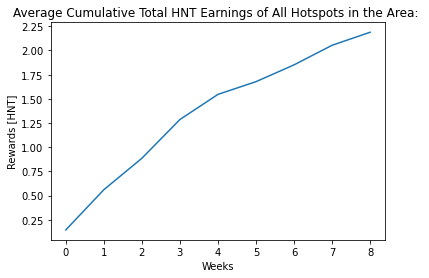

In [43]:
print(len(totalRewardsPerAddress))
print(totalRewardsPerAddress['112PCSeziHdCF7q9FtwP2ZpcMWLcQQ2TvqKTA5PiEdBUkp1tztyq'])
print(totalRewardsPerAddress['112PCSeziHdCF7q9FtwP2ZpcMWLcQQ2TvqKTA5PiEdBUkp1tztyq'][0])

print(totalRewardsPerAddress)

average_total = []
sum1 = 0
mean = 0

for i in range(len(totalRewardsPerAddress[list(totalRewardsPerAddress.keys())[0]])):
    for key in totalRewardsPerAddress.keys():
#         print(totalRewardsPerAddress[key][i])
        sum1 += totalRewardsPerAddress[key][i]
    mean = sum1 / (len(totalRewardsPerAddress))
    average_total.append(mean)
    sum1 = 0
    mean = 0
print(average_total)
plt.plot(np.cumsum(average_total))
plt.title("Average Cumulative Total HNT Earnings of All Hotspots in the Area: ")
plt.xlabel("Weeks")
plt.ylabel("Rewards [HNT]")
plt.show()

